# Type of visualizations

1) Matplotlib 
    - great for static plots
    - It's a low level library, we need to manually add many elements (labels, legends, gridlines)
    - it offers a lot of flexibility but you need to write more codes to get complex visualization
    - you will have to manually loop through data and customize the plot

2) Seaborn
    - It provides more statistical plots
    - Based on the example provided below, plotting is simply done wihtout using loop.
    - Seaborn automatically handles the looping internally based on 'hue='State'" argument
    - It makes code more concise and easier to read
    - Sbn proides a high level interface for drawing attractive and informative statistical graphics.
    - less effort is needed to create attractive visualization as it comes with built in thmese and color palettes. 

3) Plotly
    - It offers **interactive** and visually appealing charts

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

state = pd.read_excel(r"C:\Users\ASYIKIN\OneDrive\Desktop\PYTHON FOR DATA ANALYSIS\PROJECTS\Population\Dataset_pop\States_pop.xlsx")

state.head()


,Year,Johor,Kedah,Kelantan,Melaka,N_9,Pahang,Penang,Perak,Perlis,Selangor,T'ganu,Sabah,Sarawak,KL
0,1980,1646.2,1119.9,895.7,466.9,576.7,802.1,960.7,1807.4,148.7,1524.1,541.7,1055.1,1351.1,982.9
1,1981,1689.3,1140.2,920.5,472.6,587.2,820.6,975.4,1838.2,151.6,1594.6,560.8,1119.6,1380.2,1006.1
2,1982,1734.6,1161.8,947.1,478.7,598.9,842.3,990.9,1866.8,154.9,1668.3,581.4,1186.5,1410.4,1028.5
3,1983,1780.2,1183.9,974.6,484.8,611.3,864.8,1006.2,1891.1,158.2,1743.8,602.9,1255.1,1440.6,1050.7
4,1984,1825.8,1206.1,1002.6,491.2,623.8,888.7,1021.1,1912.3,161.7,1822.0,625.8,1325.7,1471.4,1072.2


In [28]:
state.columns

Index(['Year', 'Johor', 'Kedah', 'Kelantan', 'Melaka', 'N_9', 'Pahang',
       'Penang', 'Perak', 'Perlis', 'Selangor', 'T'ganu', 'Sabah', 'Sarawak',
       'KL'],
      dtype='object')

# Visualize using Matplotlib

- my table does not have separate columns indicating state, I have to pivot the data frame before I can plot it.

- Melt data frame
    * convert DF from wide format into long format DF where I have columns for 'year', 'state', 'population'

In [29]:
#melt DF

melted_state = state.melt(id_vars='Year', var_name='State', value_name='Population')
melted_state.head()

,Year,State,Population
0,1980,Johor,1646.2
1,1981,Johor,1689.3
2,1982,Johor,1734.6
3,1983,Johor,1780.2
4,1984,Johor,1825.8


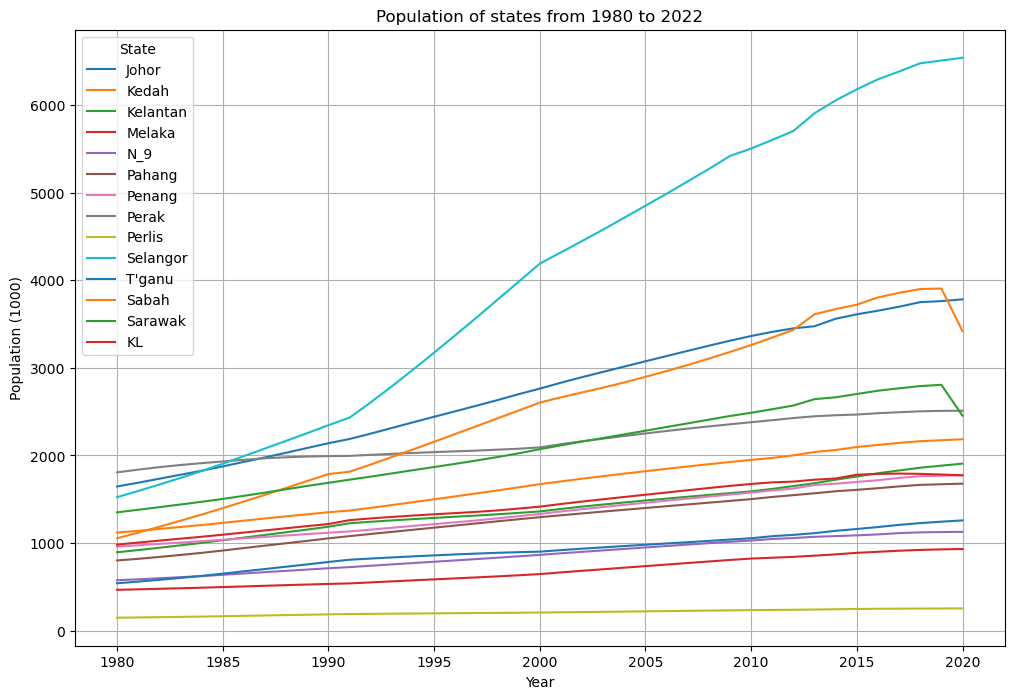

In [30]:
# plot

plt.figure(figsize=(12,8))
for state in melted_state['State'].unique():
    state_data = melted_state[melted_state['State'] == state]
    plt.plot(state_data['Year'], state_data['Population'], label=state)
    
plt.xlabel('Year')
plt.ylabel('Population (1000)')
plt.title('Population of states from 1980 to 2022')
plt.legend(title='State')
plt.grid(True)
plt.show()

# Visualise using Seaborn 

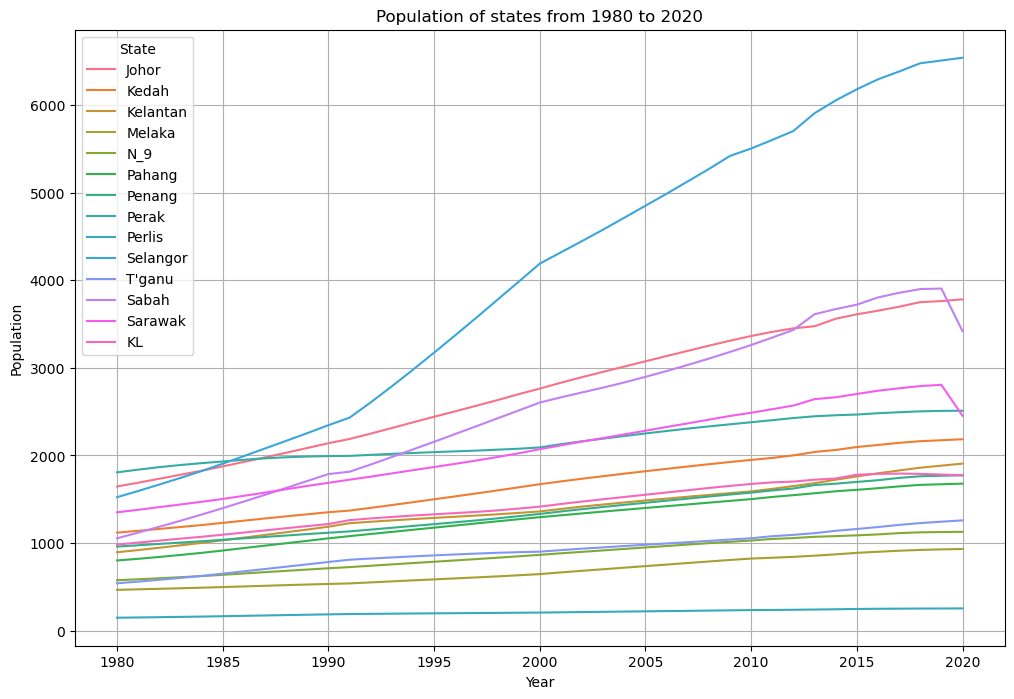

In [32]:
plt.figure(figsize=(12,8))
sns.lineplot(data=melted_state, x='Year', y='Population', hue='State')

plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population of states from 1980 to 2020')
plt.grid(True)
plt.show()

# Visualize using Plotly

1) Bar chart
    - it's used to compare the population of different states for a specific year 

2) Scatter plot
    - It shows the relationship between the population and year for each state

3) Area chart
    - It shows how the population distribution changes over time, emphasizing the magnitude of the population in each state

4) Box plot
    - it's used to summarize the distribution of pop data for each state over the entire period
    - this can highlight the variability and any outliers

5) Heatmap
    - It's useful to visualize the population density across states over the years
    - It provides a quick overview of where the population is concentrated

6) Facet Plot
    - it allows you to create small multiples, whcih are useful for comparing trends across multiple states in a more detailed way

7) Animation
    - Animated line chart or scatter plit to show the change in population over time
    - the animation progresses through each year

In [33]:
# line chart

import plotly.express as px

fig = px.line(melted_state, x='Year', y='Population', color='State', title='Population of States from 1980 to 2020')
fig.update_layout(xaxis_title='Year', yaxis_title='Population')
fig.show()

In [35]:
# Bar chart

import plotly.express as px

# filter the DF for the year 1980
df_1980 = melted_state[melted_state['Year'] == 1980]

# Sort DF by pop in descending order
df_1980 = df_1980.sort_values(by='Population', ascending=False)

# create bar chart
fig = px.bar(df_1980, x='State', y='Population', title='Population of states in 1980')
fig.show()

In [62]:
# # 1990
# import plotly.express as px

# # filter the DF for the year 1980
# df_1990 = melted_state[melted_state['Year'] == 1990]

# # Sort DF by pop in descending order
# df_1990 = df_1990.sort_values(by='Population', ascending=False)

# # create bar chart
# fig = px.bar(df_1990, x='State', y='Population', title='Population of states in 1990')
# fig.show()

In [61]:
# # 2000
# import plotly.express as px

# # filter the DF for the year 1980
# df_2000 = melted_state[melted_state['Year'] == 2000]

# # Sort DF by pop in descending order
# df_2000 = df_2000.sort_values(by='Population', ascending=False)

# # create bar chart
# fig = px.bar(df_2000, x='State', y='Population', title='Population of states in 2000')
# fig.show()

In [60]:
# # 2010
# import plotly.express as px

# # filter the DF for the year 1980
# df_2010 = melted_state[melted_state['Year'] == 2010]

# # Sort DF by pop in descending order
# df_2010 = df_2010.sort_values(by='Population', ascending=False)

# # create bar chart
# fig = px.bar(df_2010, x='State', y='Population', title='Population of states in 2010')
# fig.show()

In [59]:
# # 2020
# import plotly.express as px

# # filter the DF for the year 1980
# df_2020 = melted_state[melted_state['Year'] == 2020]

# # Sort DF by pop in descending order
# df_2020 = df_2020.sort_values(by='Population', ascending=False)

# # create bar chart
# fig = px.bar(df_2020, x='State', y='Population', title='Population of states in 2020')
# fig.show()

In [43]:
# bar charts with multiple years

# filter the DF for the year 1980
df_selected_years = melted_state[melted_state['Year'].isin([1980, 1990, 2000, 2010, 2020])]

# sort the DF by pop in desc order within each year
df_selected_years = df_selected_years.sort_values(by=['Year', 'Population'], ascending=[True, True])

#create bar chart
fig = px.bar(df_selected_years, x='State', y='Population', color='Year', barmode='group', 
title="Population of Malaysia across states in 1980, 1990, 2000, 2010, 2020",
labels={'Population': 'Population (in 1000s)'})

# center the chart title
fig.update_layout(title_x=0.5)

#show the chart
fig.show()


In [57]:
# scatter plot

fig = px.scatter(melted_state, x='Year', y='Population', color='State', trendline='ols', 
title='Population of states from 1980 to 2020',
labels={'Population': 'Population (in 1000s)'})

fig.show()

In [58]:
# Area chart

fig = px.area(melted_state, x='Year', y='Population', color='State',
title='Population of states from 1980 to 2020',
labels={'Population': 'Population (in 1000s)'})

fig.show()

In [66]:
# boX plot

fig = px.box(melted_state, x='State', y='Population',
title='Distribution of states from 1980 to 2020',
labels={'Population': 'Population (in 1000s)'})

fig.show()

In [76]:
# heat map

#pivot the DF
pivot_df = melted_state.pivot(index='Year', columns='State', values='Population')

#create heatmap
fig = px.imshow(pivot_df, labels=dict(x='State', y='Year', color='Population'),
title='Distribution of states from 1980 to 2020')

fig.show()

In [87]:
# facet plot

fig = px.line(melted_state, x='Year', y='Population', facet_col='State', facet_col_wrap=3,
title='Population of states from 1980 to 2020')

# adjust layout to add space between facets
fig.update_layout(
    title='Population of states from 1980 to 2020',
    margin=dict(t=50, b=50, l=50, r=50),
    height=800,
    width=1200
)

# center the chart title
fig.update_layout(title_x=0.5)

fig.show()



In [89]:
# Animation
fig = px.line(melted_state, x='Year', y='Population', color='State',
title='Population of states from 1980 to 2020',
animation_frame='Year')

fig.show()
